In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
import sklearn.metrics as ms
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
plt.rc("font",size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid",color_codes=True)

In [2]:
data = pd.read_csv("bank-full.csv", delimiter=";")
#data
data.shape

(45211, 17)

In [3]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
data.head(60)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [5]:
#data = data.dropna()

In [6]:
#data.shape

In [7]:
list(map(print, enumerate(list(data.columns))))
# 0 3 7 8 9 10 11 12 13 15 16 17 18 19
# 0 3 8 9 10 11 12 14 13 15 16

(0, 'age')
(1, 'job')
(2, 'marital')
(3, 'education')
(4, 'default')
(5, 'balance')
(6, 'housing')
(7, 'loan')
(8, 'contact')
(9, 'day')
(10, 'month')
(11, 'duration')
(12, 'campaign')
(13, 'pdays')
(14, 'previous')
(15, 'poutcome')
(16, 'y')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

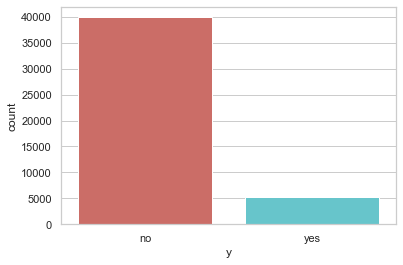

In [8]:
sns.countplot(x="y", data=data, palette="hls")
plt.show()

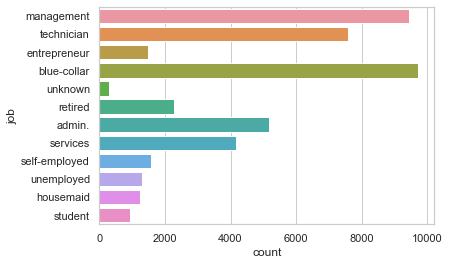

In [9]:
sns.countplot(y="job", data=data)
plt.show()

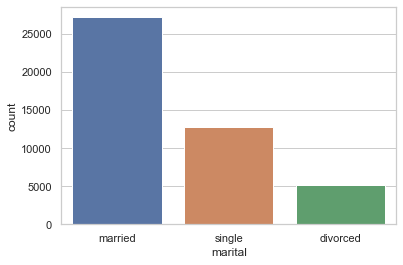

In [10]:
sns.countplot(x="marital", data=data)
plt.show()

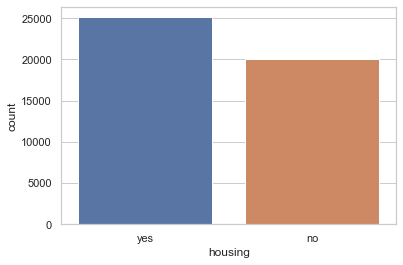

In [11]:
sns.countplot(x="housing", data=data)
plt.show()

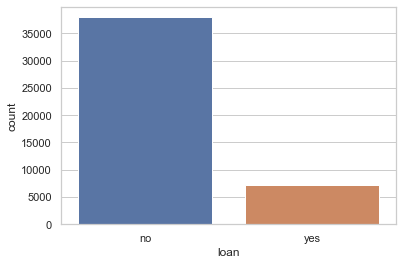

In [12]:
sns.countplot(x="loan", data=data)
plt.show()

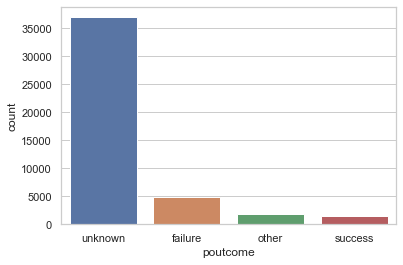

In [13]:
sns.countplot(x="poutcome", data=data)
plt.show()

In [14]:
data.drop(data.columns[[0, 3, 8, 9, 10, 11, 12, 14, 13, 5]], axis=1, inplace=True)
data

,job,marital,default,housing,loan,poutcome,y
0,management,married,no,yes,no,unknown,no
1,technician,single,no,yes,no,unknown,no
2,entrepreneur,married,no,yes,yes,unknown,no
3,blue-collar,married,no,yes,no,unknown,no
4,unknown,single,no,no,no,unknown,no
...,...,...,...,...,...,...,...
45206,technician,married,no,no,no,unknown,yes
45207,retired,divorced,no,no,no,unknown,yes
45208,retired,married,no,no,no,success,yes
45209,blue-collar,married,no,no,no,unknown,no


In [15]:
data2 = pd.get_dummies(data, columns=["job", "marital", "default", "housing", "loan", "poutcome"])
data2

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,no,0,0,0,0,1,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,no,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
2,no,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,no,0,1,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,no,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45207,yes,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45208,yes,0,0,0,0,0,1,0,0,0,...,1,0,1,0,1,0,0,0,1,0
45209,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1


In [16]:
list(map(print, enumerate(list(data2.columns))))


(0, 'y')
(1, 'job_admin.')
(2, 'job_blue-collar')
(3, 'job_entrepreneur')
(4, 'job_housemaid')
(5, 'job_management')
(6, 'job_retired')
(7, 'job_self-employed')
(8, 'job_services')
(9, 'job_student')
(10, 'job_technician')
(11, 'job_unemployed')
(12, 'job_unknown')
(13, 'marital_divorced')
(14, 'marital_married')
(15, 'marital_single')
(16, 'default_no')
(17, 'default_yes')
(18, 'housing_no')
(19, 'housing_yes')
(20, 'loan_no')
(21, 'loan_yes')
(22, 'poutcome_failure')
(23, 'poutcome_other')
(24, 'poutcome_success')
(25, 'poutcome_unknown')


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [17]:
data2.drop(data2.columns[[12, 18, 23]], axis=1, inplace=True)
data2.columns

Index(['y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single', 'default_no',
       'default_yes', 'housing_yes', 'loan_no', 'loan_yes', 'poutcome_failure',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

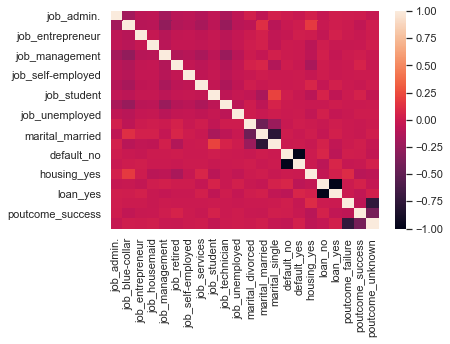

In [18]:
sns.heatmap(data2.corr())
plt.show()

In [19]:
data2

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,poutcome_unknown
0,no,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
1,no,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,1
2,no,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,no,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
45207,yes,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45208,yes,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
45209,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [20]:
#data2.drop(data2.columns[[0, 3, 8, 9, 10, 11, 12, 14, 13]], axis=1, inplace=True)
data2

,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,marital_married,marital_single,default_no,default_yes,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,poutcome_unknown
0,no,0,0,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
1,no,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,1
2,no,0,0,1,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,no,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
45207,yes,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45208,yes,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
45209,no,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [21]:
x = data2.iloc[:, 1:]
x

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,default_no,default_yes,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,1,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
45207,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
45208,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
45209,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [22]:
y = data2.iloc[:, 0]
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [24]:
x_train

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,default_no,default_yes,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,poutcome_unknown
33362,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,1,1,0,0,0,1
28229,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,1,1,0,0,0,1
37952,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,0,1
43408,0,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
9897,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30403,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
21243,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
42613,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
43567,0,0,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,0


In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)
x_train

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,marital_married,marital_single,default_no,default_yes,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_success,poutcome_unknown
32731,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,0
1498,0,1,0,0,0,0,0,0,0,0,...,1,0,1,0,1,1,0,0,0,1
17532,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
8166,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,1,1,0,0,0,1
15495,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43723,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
32511,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,1
5192,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
12172,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1


In [26]:
x_train.shape


(33908, 22)

In [27]:
x_test.shape

(11303, 22)

In [28]:
33908/45211

0.7499944703722545

In [29]:
lis = pd.DataFrame([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [30]:
lis

,0
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [31]:
# import random

In [32]:
# random.seed(5)
# arr = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 
# random.choice(arr)


In [33]:

# random.seed(5) 
# random.choice(arr)


In [34]:
# random.seed(2)
# random.choice(arr)


In [35]:
# random.seed(5)
# random.choice(arr)

In [36]:
# random.seed(5)
# random.choice(arr)

In [37]:
# random.choice(arr)

In [38]:
# random.choice(arr)

In [39]:
# random.choice(arr)

## Logistic Regression model

In [40]:
classifier1 = LogisticRegression(random_state=0)
classifier1.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
classifier2 = LogisticRegression(random_state=1)
classifier2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

the confusion_matrix()

In [42]:
y_pred = classifier1.predict(x_test)
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
np.transpose(con_matrix)

array([[9878, 1074],
       [ 120,  231]], dtype=int64)

In [43]:
ms.accuracy_score(y_test, y_pred)

0.8943643280544988

In [44]:
9878+231

10109

In [45]:
10109+1074+120

11303

In [46]:
10109/11303

0.8943643280544988

In [47]:
231/(120+231)

0.6581196581196581

In [48]:
9878/(9878+1074)

0.9019357195032871

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9998
         yes       0.66      0.18      0.28      1305

    accuracy                           0.89     11303
   macro avg       0.78      0.58      0.61     11303
weighted avg       0.87      0.89      0.87     11303



In [50]:
y_pred = classifier1.predict(x_test)
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
np.transpose(con_matrix)


array([[9878, 1074],
       [ 120,  231]], dtype=int64)

In [51]:
9878/(9878+120)

0.987997599519904

In [52]:
231/(1074+231)

0.17701149425287357

## Neural Network model

In [53]:
network_model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=0, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
network_model

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [54]:
network_model.fit(x_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [55]:
y_pred = network_model.predict(x_test)
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(y_test, y_pred)
np.transpose(con_matrix)

array([[9889, 1080],
       [ 109,  225]], dtype=int64)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9998
         yes       0.67      0.17      0.27      1305

    accuracy                           0.89     11303
   macro avg       0.79      0.58      0.61     11303
weighted avg       0.88      0.89      0.87     11303



## SVM model

In [57]:
from sklearn import svm

SVM_model = svm.SVC(kernel="linear")

In [58]:
SVM_model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
predict = SVM_model.predict(x_test)

In [60]:
from sklearn.metrics import confusion_matrix
con_matrix = confusion_matrix(predict, y_test)
con_matrix

array([[9862, 1051],
       [ 136,  254]], dtype=int64)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

          no       0.90      0.99      0.94      9998
         yes       0.65      0.19      0.30      1305

    accuracy                           0.89     11303
   macro avg       0.78      0.59      0.62     11303
weighted avg       0.87      0.89      0.87     11303

